# Data Visualization With Pandas
Import Data

In [1]:
import pandas as pd
import numpy as np

Generate data

In [2]:
numbers = np.random.randint(1,100,100)
cols = ['col1', 'col2', 'col3', 'col4', 'col5']
df = pd.DataFrame(numbers.reshape(20,5), columns = cols)
df

,col1,col2,col3,col4,col5
0,48,83,64,94,3
1,29,23,93,37,80
2,10,46,70,88,5
3,40,71,92,97,95
4,23,14,6,51,99
5,54,51,31,43,15
6,13,44,87,53,80
7,65,62,38,20,73
8,72,98,97,11,79
9,81,65,33,56,35


In [3]:
df.style.background_gradient(cmap='Spectral')

,col1,col2,col3,col4,col5
0,48,83,64,94,3
1,29,23,93,37,80
2,10,46,70,88,5
3,40,71,92,97,95
4,23,14,6,51,99
5,54,51,31,43,15
6,13,44,87,53,80
7,65,62,38,20,73
8,72,98,97,11,79
9,81,65,33,56,35


This is really hard to understand, we should stick to more "liniar" gradiants

In [4]:
df.style.background_gradient(cmap='Oranges')

,col1,col2,col3,col4,col5
0,48,83,64,94,3
1,29,23,93,37,80
2,10,46,70,88,5
3,40,71,92,97,95
4,23,14,6,51,99
5,54,51,31,43,15
6,13,44,87,53,80
7,65,62,38,20,73
8,72,98,97,11,79
9,81,65,33,56,35


### axis
The formmatting is on the Y axis (Columns) by default but we can change it (Notice the difference in row 2, for example)

In [5]:
df.style.background_gradient(cmap='Oranges', axis = 1)

,col1,col2,col3,col4,col5
0,48,83,64,94,3
1,29,23,93,37,80
2,10,46,70,88,5
3,40,71,92,97,95
4,23,14,6,51,99
5,54,51,31,43,15
6,13,44,87,53,80
7,65,62,38,20,73
8,72,98,97,11,79
9,81,65,33,56,35


### subset
We can highlight just selected columns instead of the entire df

In [6]:
df.style.background_gradient(cmap='Blues', subset=['col1', 'col4'])

,col1,col2,col3,col4,col5
0,48,83,64,94,3
1,29,23,93,37,80
2,10,46,70,88,5
3,40,71,92,97,95
4,23,14,6,51,99
5,54,51,31,43,15
6,13,44,87,53,80
7,65,62,38,20,73
8,72,98,97,11,79
9,81,65,33,56,35


Let's generate a simpler table

In [7]:
sales = np.random.randint(100,999,1000)
sales_dframe = pd.DataFrame(sales)

In order to display charts within the notebook we'll run the following command:

In [3]:
%matplotlib inline

## hist()
Create a histogram from a dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026391741310>]],
      dtype=object)

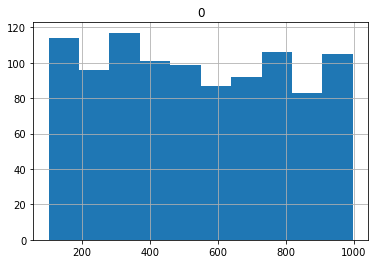

In [9]:
sales_dframe.hist()

### ;
We can use the semicolon (;) to get rid of matplotlib's output

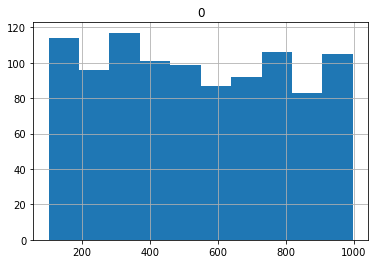

In [21]:
sales_dframe.hist();

### grid

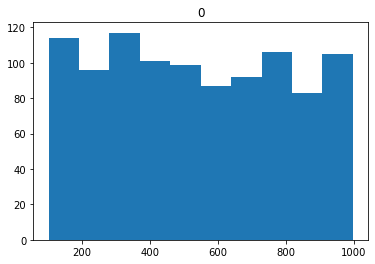

In [22]:
sales_dframe.hist(grid = False);

### color

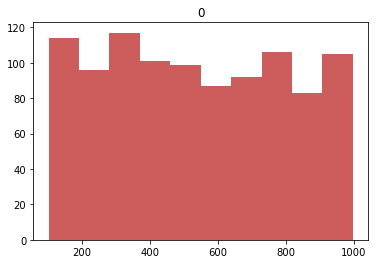

In [23]:
sales_dframe.hist(grid = False, color = 'indianred');

If we want to see what colors are available for us to use we can use the following code, taken from <a href = "https://matplotlib.org/stable/gallery/color/named_colors.html">matplotlib's documetation</a>

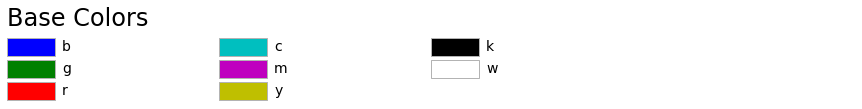

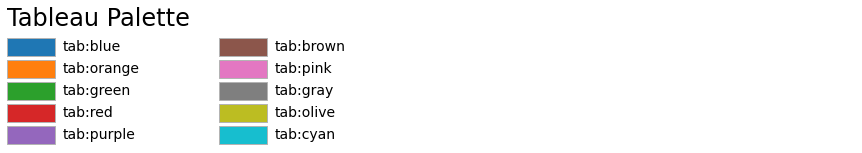

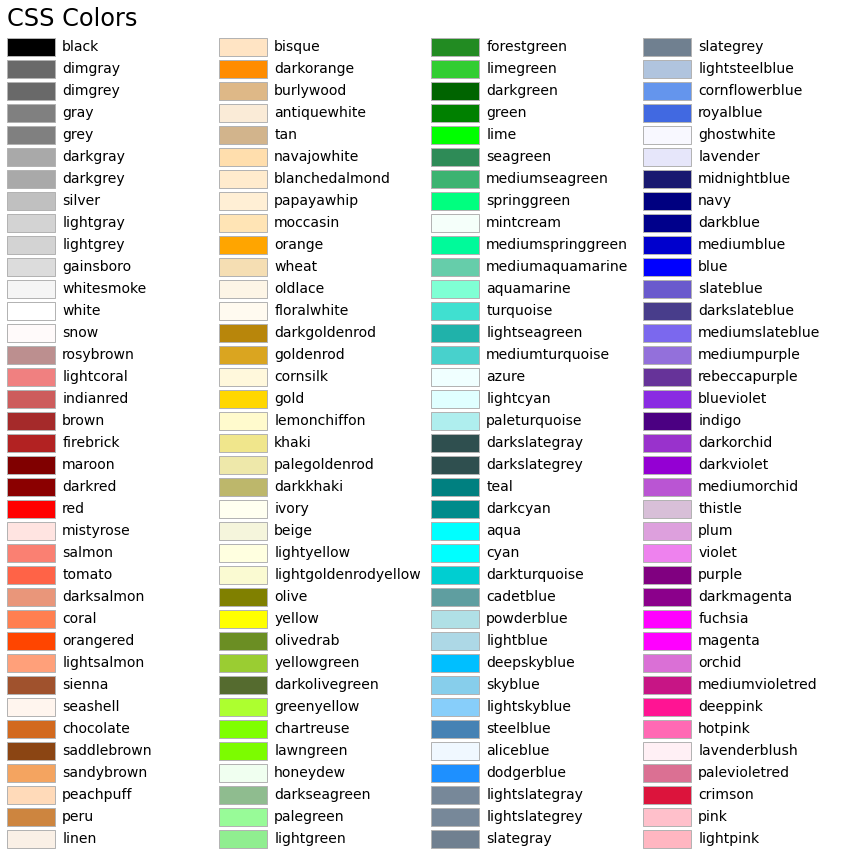

In [4]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

plt.show()

### edgecolor

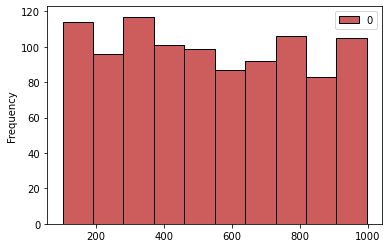

In [42]:
sales_dframe.plot.hist(edgecolor='black', grid = False, color = 'indianred');

### title / legend

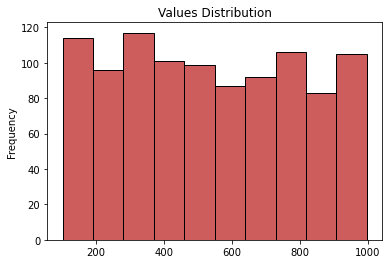

In [34]:
sales_dframe.plot.hist(edgecolor='black', 
                       grid = False, 
                       color = 'indianred', 
                       title = 'Values Distribution', 
                       legend = False);

### bins
we can increase the number of bins in the chart to increase accuracy

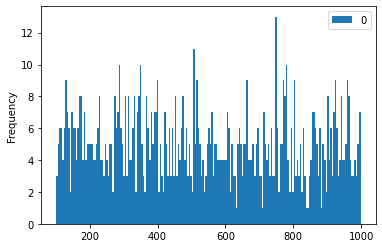

In [41]:
sales_dframe.plot.hist(bins=200);

### figsize

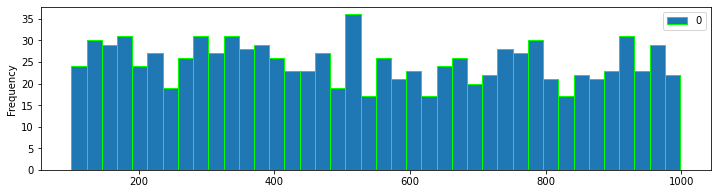

In [39]:
sales_dframe.plot.hist(bins = 40, figsize = (12, 3), edgecolor = 'lime');

### xticks

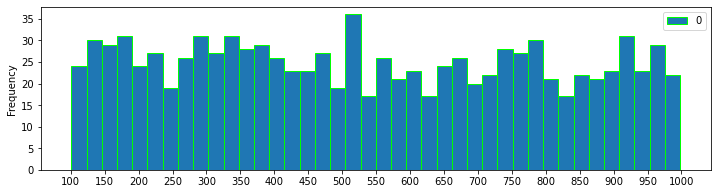

In [44]:
sales_dframe.plot.hist(bins = 40, 
                       figsize = (12, 3), 
                       edgecolor = 'lime',
                      xticks = range(100, 1001, 50));

### cumulative 

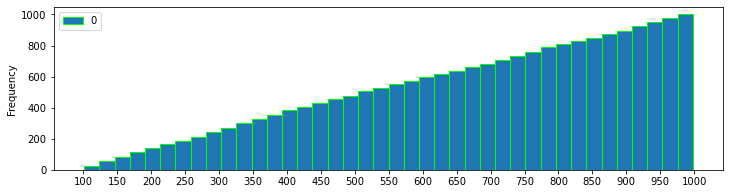

In [45]:
sales_dframe.plot.hist(bins = 40, 
                       figsize = (12, 3), 
                       edgecolor = 'lime',
                      xticks = range(100, 1001, 50),
                      cumulative = True);

### density

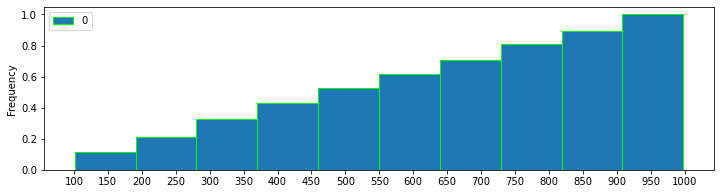

In [50]:
sales_dframe.plot.hist(figsize = (12, 3), 
                       edgecolor = 'lime',
                       xticks = range(100, 1001, 50),
                       cumulative = True,
                      density = True);

In [69]:
sales_dframe[1] = sales_dframe[0] * np.random.randn() * 2
sales_dframe.head()

,0,1
0,352,237.165160
1,398,268.158334
2,799,538.337963
3,812,547.096903
4,887,597.629253


### alpha

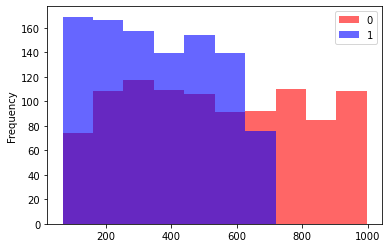

In [75]:
sales_dframe.plot.hist(alpha = 0.6, color = ['red', 'blue']);

### ylim / xlim
we can use those arguments to limit the range of our y or x axes

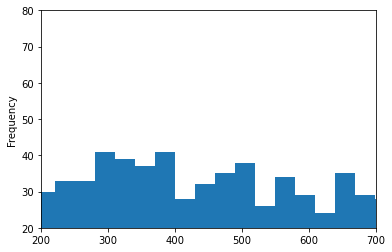

In [81]:
sales_dframe[0].plot.hist(ylim = (20, 80), xlim = (200, 700), bins = 30);

## bar()

In [91]:
sales = np.random.randn(20)
sales_dframe = pd.DataFrame(sales)
sales_dframe.head()

,0
0,-0.124211
1,-0.028332
2,-1.071502
3,0.595283
4,0.961592


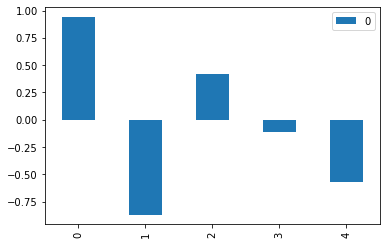

In [86]:
sales_dframe.head().plot.bar()

lets make the array into a matrix

In [92]:
sales_dframe = pd.DataFrame(abs(sales.reshape(5,4)))
sales_dframe

,0,1,2,3
0,0.124211,0.028332,1.071502,0.595283
1,0.961592,1.012183,1.213114,1.248199
2,0.364097,0.444449,0.475304,0.004951
3,0.569555,0.063536,1.613444,0.066560
4,1.159221,0.215369,0.839497,1.285643


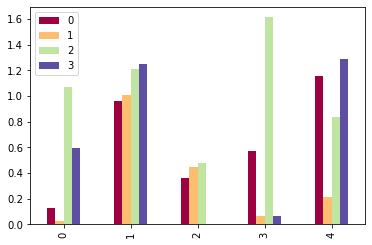

In [98]:
sales_dframe.plot.bar(cmap = 'Spectral')

### stacked

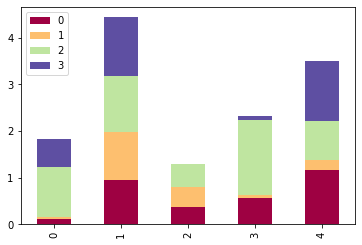

In [97]:
sales_dframe.plot.bar(stacked = True, cmap = 'Spectral')

In [100]:
sales_dframe

,0,1,2,3
0,0.124211,0.028332,1.071502,0.595283
1,0.961592,1.012183,1.213114,1.248199
2,0.364097,0.444449,0.475304,0.004951
3,0.569555,0.063536,1.613444,0.066560
4,1.159221,0.215369,0.839497,1.285643


### 100% stacked column
We can create a 100% stacked column by normalizing the data and turning each row to a total of 1

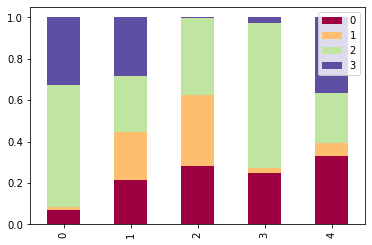

In [118]:
sales_dframe = sales_dframe.div(sales_dframe.sum(axis=1), axis=0) 

sales_dframe.plot.bar(stacked= True, cmap = 'Spectral')

## area()

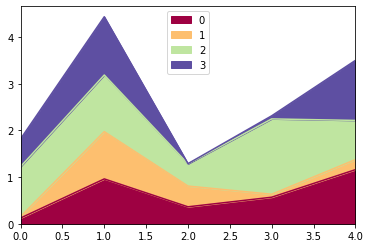

In [99]:
sales_dframe.head().plot.area(cmap = 'Spectral')

### alpha

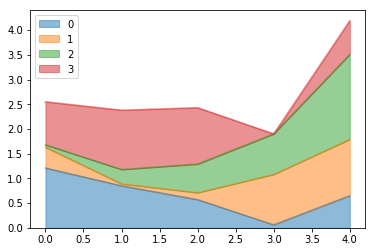

In [12]:
sales_dframe.head(5).plot.area(alpha = 0.5)

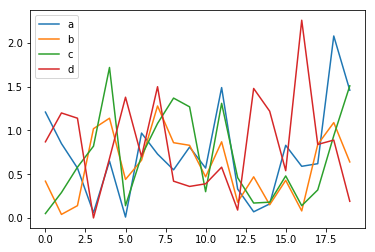

In [33]:
sales_dframe.head(20).plot.line()

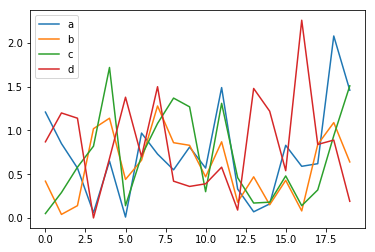

In [35]:
sales_dframe.head(20).plot.line()

### secondary_y
Let's generate a new df, one columns would be much larger then the second

In [128]:
data = pd.DataFrame(np.random.randint(1,100,100).reshape(50,2), columns = ['a','b'])
data['b'] = data['b'] * 1000
data.head()

,a,b
0,65,52000
1,25,32000
2,65,68000
3,12,72000
4,2,16000


If we try to display both on the same axis, the first column will be nearly invisible, <br>dwarfed by the column containing the larger values

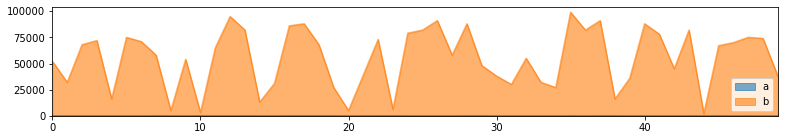

In [138]:
data.plot.area(alpha = 0.6, figsize = (13,2));

`secondary_y` allows us to dispaly both simultaneously on two different axes

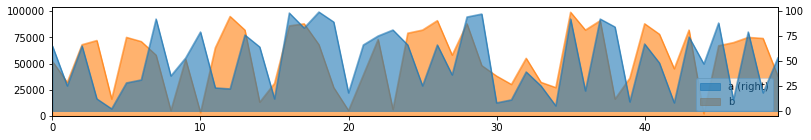

In [146]:
data.plot.area(secondary_y = 'a', alpha = 0.6, figsize = (13,2));

### x / y
By default, pandas will use the index to create the x axis for the line chart. <br>
We can overwrite this by specifying explicitly the columns we want to use for the x and y axes

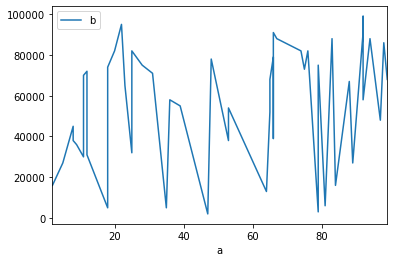

In [172]:
data.sort_values('a', inplace = True)
data.plot.line(x = 'a', y = 'b');

## Pie Chart

In [165]:
sales = pd.read_csv('Sales.csv')
sales.head()

,SalesOrderID,OrderDate,OnlineOrderFlag,Territory,SubTotal,TaxAmt,Freight,TotalDue
0,43659,2011-05-31 00:00:00,False,Southeast US,20565.6206,1971.5149,616.0984,23153.2339
1,43660,2011-05-31 00:00:00,False,Southeast US,1294.2529,124.2483,38.8276,1457.3288
2,43661,2011-05-31 00:00:00,False,Canada,32726.4786,3153.7696,985.5530,36865.8012
3,43662,2011-05-31 00:00:00,False,Canada,28832.5289,2775.1646,867.2389,32474.9324
4,43663,2011-05-31 00:00:00,False,Southwest US,419.4589,40.2681,12.5838,472.3108


In [169]:
freight_by_country = sales.groupby('Territory')['Freight'].sum()
freight_by_country

Territory
Australia         275962.0834
Canada            486466.4333
Central US        239116.7252
France            206712.8319
Germany           134383.8541
Northeast US      209722.6548
Northwest US      470647.1791
Southeast US      239153.4043
Southwest US      706187.0115
United Kingdom    215078.0742
Name: Freight, dtype: float64

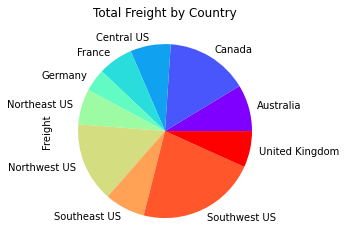

In [182]:
freight_by_country.plot.pie(cmap = 'rainbow', title = 'Total Freight by Country');

### explode

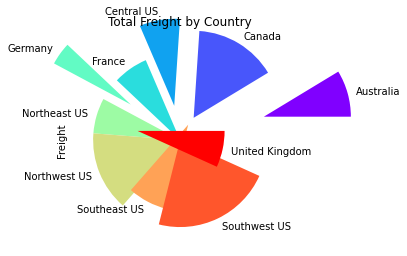

In [183]:
freight_by_country.plot.pie(cmap = 'rainbow', 
                            title = 'Total Freight by Country', 
                            explode = (1,0.3,0.4,0,0.7,0,0,-0.2,0,-0.5));

### Scatter Plot

In [43]:
numbers = np.random.randn(1000).reshape(250,4)
dFrame = pd.DataFrame(data = numbers, columns = 'a b c d'.split())
dFrame.head()

,a,b,c,d
0,-0.336006,0.097941,-0.634902,-0.693586
1,-0.726983,-0.979517,-0.445246,-0.983237
2,0.320564,1.435282,0.702027,0.820201
3,-0.398362,0.409333,2.266382,1.094795
4,-0.040355,0.133615,-0.886820,-0.399035


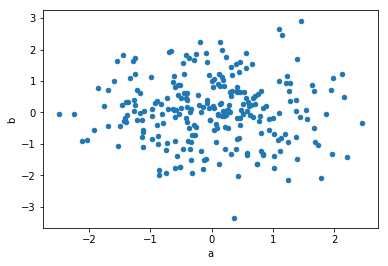

In [44]:
dFrame.plot.scatter(x = 'a', y = 'b')

we can add a color dimension

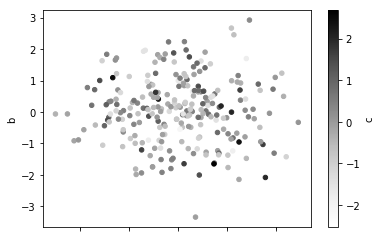

In [45]:
dFrame.plot.scatter(x = 'a', y = 'b', c = 'c')

if we don't like black/white scale we can change it

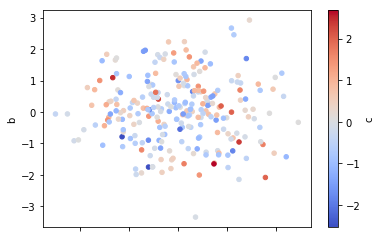

In [46]:
dFrame.plot.scatter(x = 'a', y = 'b', c = 'c', cmap = 'coolwarm')

we can also add a size dimension. This thime we need the name of the frame as well

c:\python\python3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


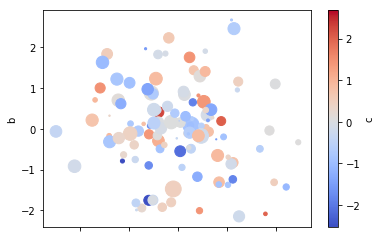

In [50]:
dFrame.plot.scatter(x = 'a', y = 'b', c = 'c', cmap = 'coolwarm', s = dFrame['d']*100) # Dots are too small by default

### Box Plot

In [52]:
dFrame.describe()

,a,b,c,d
count,250.000000,250.000000,250.000000,250.000000
mean,0.012704,0.048001,-0.075341,-0.031985
std,0.956525,1.032720,0.914851,0.991415
min,-2.500874,-3.342578,-2.540111,-2.746845
25%,-0.608936,-0.648361,-0.728467,-0.723612
50%,0.046016,0.063513,-0.119364,-0.057302
75%,0.623816,0.687394,0.483819,0.737174
max,2.460407,2.921838,2.691176,2.680314


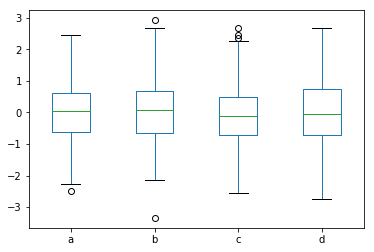

In [53]:
dFrame.plot.box()

### Hex Bin

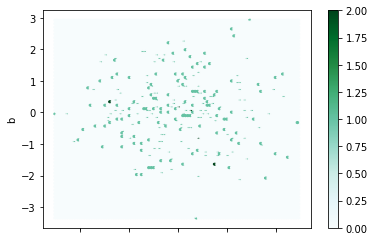

In [54]:
dFrame.plot.hexbin(x = 'a', y = 'b')

let's make it larger

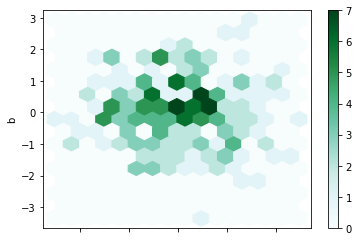

In [55]:
dFrame.plot.hexbin(x = 'a', y = 'b', gridsize=15)

custom color scales work here as well

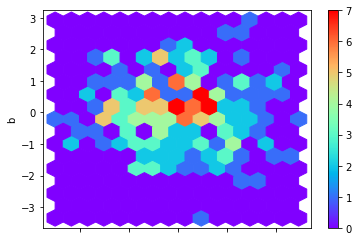

In [60]:
dFrame.plot.hexbin(x = 'a', y = 'b', gridsize=15, cmap = 'rainbow')